# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [107]:
#()[]{}
import numpy as np
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv")
display(data)
display(data.columns)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [108]:
#()[]{}

data_2 = data[(data["Total Claim Amount"]>1000)&(data["Response"]=="Yes")]
display(data_2["Response"].unique())
display(data_2["Total Claim Amount"].min())

array(['Yes'], dtype=object)

1008.0

2. Using the original dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [109]:
#()[]{}
data_3 = data[(data["Response"]=="Yes")]
analysis=data_3.pivot_table(index=["Policy Type", "Gender"], values="Total Claim Amount", aggfunc="mean").reset_index()
display(analysis)

,Policy Type,Gender,Total Claim Amount
0,Corporate Auto,F,433.738499
1,Corporate Auto,M,408.582459
2,Personal Auto,F,452.965929
3,Personal Auto,M,457.010178
4,Special Auto,F,453.280164
5,Special Auto,M,429.527942


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [110]:
#()[]{}
data_4 = data[["Policy Type", "State", "Customer"]]
display(data_4)

display(data["Policy Type"].value_counts())
# every line in the dataframe has a policy

display(data.shape[0]-data["Customer"].nunique())
# there are 1776 duplicated customers
data_4_no_dup = data_4.drop_duplicates(subset=['Customer'], keep='first')


data_4_pol = data_4_no_dup.groupby("State").agg({"Customer":"count"}).reset_index()
data_4_pol_big = data_4_pol[(data_4_pol["Customer"]>500)]
display(data_4_pol_big)
#It seems that all states have more than 500 unique customers

,Policy Type,State,Customer
0,Corporate Auto,Arizona,DK49336
1,Personal Auto,California,KX64629
2,Personal Auto,Washington,LZ68649
3,Corporate Auto,Oregon,XL78013
4,Personal Auto,Oregon,QA50777
...,...,...,...
10905,Personal Auto,Nevada,FE99816
10906,Personal Auto,Oregon,KX53892
10907,Corporate Auto,Arizona,TL39050
10908,Personal Auto,California,WA60547


Personal Auto     8128
Corporate Auto    2341
Special Auto       441
Name: Policy Type, dtype: int64

1776

,State,Customer
0,Arizona,1655
1,California,3035
2,Nevada,863
3,Oregon,2517
4,Washington,774


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [111]:
#()[]{}
data_5 = data.groupby(["Education", "Gender"]).agg({"Customer Lifetime Value":["max", "min", "median"]}).reset_index()
display(data_5)

Education Gender Customer Lifetime Value               \
                                                   max          min   
0              Bachelor      F             73225.95652  1904.000852   
1              Bachelor      M             67907.27050  1898.007675   
2               College      F             61850.18803  1898.683686   
3               College      M             61134.68307  1918.119700   
4                Doctor      F             44856.11397  2395.570000   
5                Doctor      M             32677.34284  2267.604038   
6  High School or Below      F             55277.44589  2144.921535   
7  High School or Below      M             83325.38119  1940.981221   
8                Master      F             51016.06704  2417.777032   
9                Master      M             50568.25912  2272.307310   

                
        median  
0  5640.505303  
1  5548.031892  
2  5623.611187  
3  6005.847375  
4  5332.462694  
5  5577.669457  
6  6039.553187  
7  6286.731006  
8  5729.855012  
9  5579.099207

In [112]:
#()[]{}
print(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

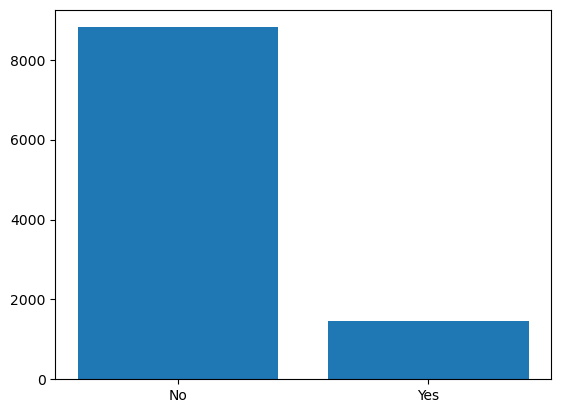

In [114]:
#()[]{}
fig, ax = plt.subplots()
ax.bar(x = data['Response'].value_counts().index, height = data['Response'].value_counts().values)
plt.show()

,Sales Channel,Response,responded_yes,share_yes
2,Call Center,2013,221.0,9.11
1,Branch,2865,326.0,8.79
3,Web,1511,177.0,8.54
0,Agent,3890,742.0,5.24


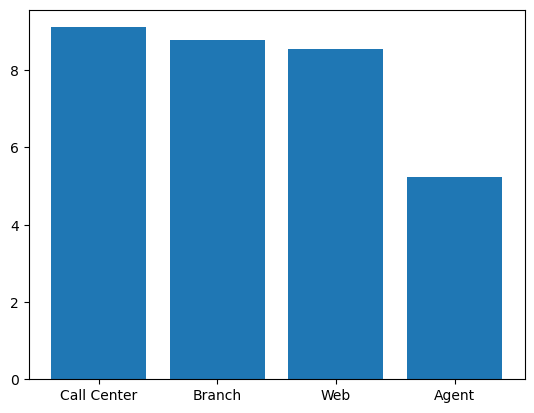

In [115]:
#()[]{}
data_7 = data.copy()
data_7["responded_yes"] = data_7["Response"].replace(to_replace="Yes", value=1).replace(to_replace="No", value=0)
response_rate = data_7.groupby("Sales Channel").agg({"Response":"count", "responded_yes":"sum"}).reset_index()
response_rate["share_yes"] = (response_rate["Response"]/response_rate["responded_yes"]).round(2)
response_rate = response_rate.sort_values(by=["share_yes"], ascending=False)
# response_rate = data_7.pivot_table(index="Sales Channel", values=["Response", "responded_yes"], aggfunc=["count", "sum"]).reset_index()
display(response_rate)
fig, ax = plt.subplots()
ax.bar(x = response_rate['Sales Channel'], height = response_rate['share_yes'])
plt.show()

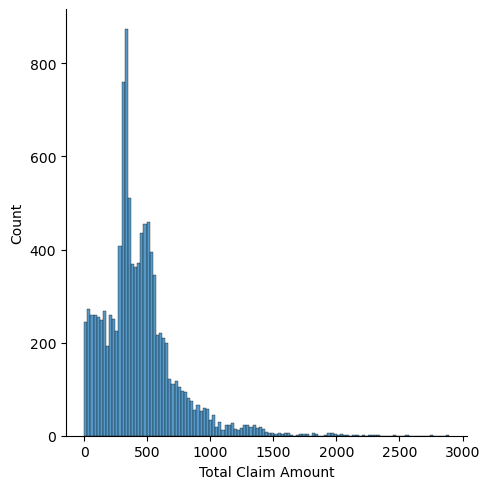

,tca_cat,Response,responded_yes,share_yes
2,1500=<,80,0.0,inf
0,0-500,6948,942.0,7.38
3,500-1000,2865,457.0,6.27
1,1000-1500,386,67.0,5.76


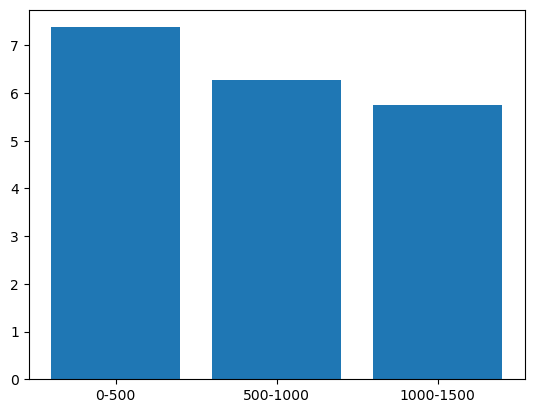

In [131]:
# Show a plot of the response rate by the total claim amount.
#()[]{}
data_8 = data.copy()
sns.displot(data_8['Total Claim Amount'])
plt.show()

data_8["tca_cat"] = data_8['Total Claim Amount'].round(0)

for i in range (0, data_8.shape[0]):
    if data_8.iloc[i,-1] < 500.000:
        data_8.iloc[i,-1] = "0-500"
    elif data_8.iloc[i,-1] in range  (500, 1000):
        data_8.iloc[i,-1] = "500-1000"
    elif data_8.iloc[i,-1] in range  (1000, 1500):
        data_8.iloc[i,-1] = "1000-1500"
    elif data_8.iloc[i,-1] >= 1500:
        data_8.iloc[i,-1] = "1500=<"
data_8["tca_cat"].value_counts()

data_8["responded_yes"] = data_8["Response"].replace(to_replace="Yes", value=1).replace(to_replace="No", value=0)
resp_rate = data_8.groupby("tca_cat").agg({"Response":"count", "responded_yes":"sum"}).reset_index()
resp_rate["share_yes"] = (resp_rate["Response"]/resp_rate["responded_yes"]).round(2)
resp_rate["share_yes"] = resp_rate["share_yes"].replace("inf", 0) #I don't understand why this doesn't work
resp_rate = resp_rate.sort_values(by=["share_yes"], ascending=False)
display(resp_rate)
fig, ax = plt.subplots()
ax.bar(x = resp_rate['tca_cat'], height = resp_rate['share_yes'])
plt.show()

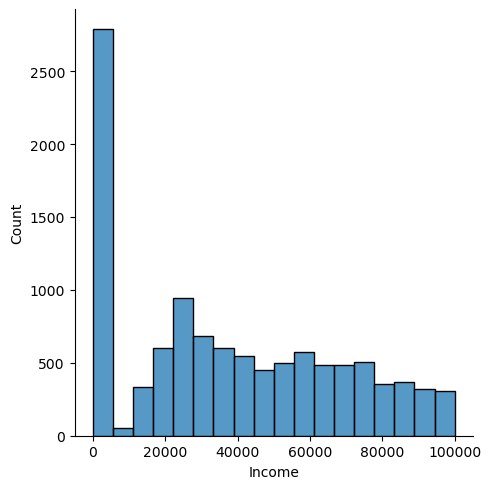

,Income_cat,Response,responded_yes,share_yes
4,80k=<,1139,125.0,9.11
0,0-20k,3220,406.0,7.93
2,40k-60k,1723,222.0,7.76
3,60k-80k,1646,258.0,6.38
1,20k-40k,2551,455.0,5.61


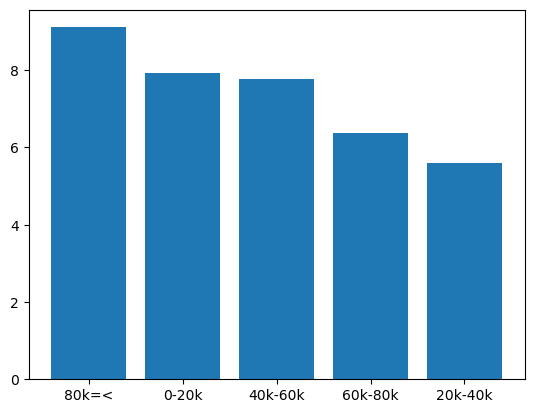

In [132]:
data_9 = data.copy()
sns.displot(data_9['Income'])
plt.show()


data_9["Income_cat"] = data_9['Income'].astype(int).round(0)
type(data_9.iloc[0, -1])
data_9.iloc[:10, :].head()


for i in range (0, data_9.shape[0]):
    if data_9.iloc[i,-1] in range  (0, 20000):
        data_9.iloc[i,-1] = "0-20k"
    elif data_9.iloc[i,-1] in range  (20000, 40000):
        data_9.iloc[i,-1] = "20k-40k"
    elif data_9.iloc[i,-1] in range  (40000, 60000):
        data_9.iloc[i,-1] = "40k-60k"
    elif data_9.iloc[i,-1] in range  (60000, 80000):
        data_9.iloc[i,-1] = "60k-80k"
    elif data_9.iloc[i,-1] in range  (80000, 100000):
        data_9.iloc[i,-1] = "80k=<"
data_9["Income_cat"].value_counts()

data_9["responded_yes"] = data_9["Response"].replace(to_replace="Yes", value=1).replace(to_replace="No", value=0)
resp_rate = data_9.groupby("Income_cat").agg({"Response":"count", "responded_yes":"sum"}).reset_index()
resp_rate["share_yes"] = (resp_rate["Response"]/resp_rate["responded_yes"]).round(2)
#resp_rate["share_yes"] = resp_rate["share_yes"].replace("inf", 0)
resp_rate = resp_rate.sort_values(by=["share_yes"], ascending=False)
display(resp_rate)
fig, ax = plt.subplots()
ax.bar(x = resp_rate['Income_cat'], height = resp_rate['share_yes'])
plt.show()





## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [1]:
# your code goes here